In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [8]:
def rk2(f, a, b, y0, n):
    h = (b-a)/n
    y = np.zeros(n+1)
    
    y[0] = y0
    
    for i in range(n):
        xi = a + i*h
        k1 = f(xi, y[i])
        k2 = f(xi + h, y[i] + h*k1) #melhorado
        y[i+1] = y[i] + h/2 * (k1 + k2)
        
    return y

In [9]:
def rk3(f, a, b, y0, n):
    h = (b-a)/n
    y = np.zeros(n+1)
    
    y[0] = y0
    
    for i in range(n):
        xi = a + i*h
        k1 = f(xi, y[i])
        k2 = f(xi + 2/3*h, y[i] + 2/3*h*k1)
        k3 = f(xi + 2/3*h, y[i] + 2/3*h*k2)
        y[i+1] = y[i] + h/4 * (k1 + 1.5*(k2+k3))
        
    return y

In [10]:
def rk4(f, a, b, y0, n):
    h = (b-a)/n
    y = np.zeros(n+1)
    
    y[0] = y0
    
    for i in range(n):
        xi = a + i*h
        k1 = f(xi, y[i])
        k2 = f(xi + h/2, y[i] + h/2 * k1)
        k3 = f(xi + h/2, y[i] + h/2 * k2)
        k4 = f(xi + h, y[i] + h * k3)
        y[i+1] = y[i] + h/6 * (k1 + 2*(k2+k3) + k4)
        
    return y

In [11]:
f = lambda x, y: 1 / (1+x**2) - 2*y**2
ex = lambda x: x/(1+x**2)

a = 0
b = 2
y0 = 0

n = 10
y2 = rk2(f, a, b, y0, n)
y3 = rk3(f, a, b, y0, n)
y4 = rk4(f, a, b, y0, n)
x = np.linspace(a, b, n+1)
y = ex(x)

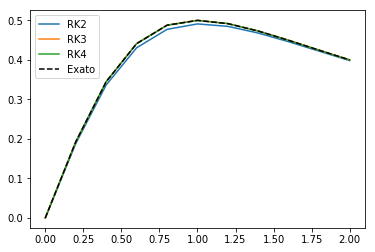

In [12]:
plt.plot(x, y2)
plt.plot(x, y3)
plt.plot(x, y4)
plt.plot(x, y, 'k--')

plt.legend(['RK2', 'RK3', 'RK4', 'Exato'])

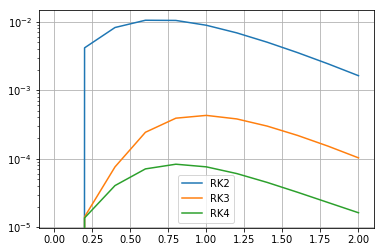

In [15]:
erk2 = np.abs(y-y2)
erk3 = np.abs(y-y3)
erk4 = np.abs(y-y4)

plt.plot(x, erk2)
plt.plot(x, erk3)
plt.plot(x, erk4)

plt.legend(['RK2', 'RK3', 'RK4'])
plt.yscale('log')
plt.grid()

In [ ]:
#Todos os erros partem do zero pois o ponto inicial é conhecido.
#O de ordem 4 é o que possui menor erro.